Get current working directory.

In [1]:
import os 
orig_dir = os.getcwd()

Import libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from src.recognition.svm import SVM

Load data and labels.

In [3]:
samples_path = 'datasets/processed/landmarks.txt'
labels_path = 'datasets/processed/valences.txt'

X = np.loadtxt(samples_path, dtype=np.float32)
y = np.loadtxt(labels_path).astype(int)

Let's see how sample data is represented... 

In [4]:
Xdf = pd.DataFrame(X)
print(Xdf.head())

      0     1      2     3      4     5      6     7      8     9   ...  \
0  400.0  67.0  407.0  62.0  416.0  61.0  425.0  67.0  416.0  70.0  ...   
1  400.0  67.0  407.0  62.0  416.0  61.0  424.0  67.0  416.0  71.0  ...   
2  400.0  67.0  407.0  62.0  416.0  61.0  424.0  67.0  416.0  71.0  ...   
3  400.0  68.0  407.0  62.0  416.0  61.0  424.0  67.0  416.0  71.0  ...   
4  400.0  67.0  406.0  62.0  416.0  62.0  424.0  67.0  416.0  71.0  ...   

      54     55     56     57     58     59     60     61     62     63  
0  452.0  130.0  467.0  133.0  452.0  140.0  446.0  141.0  439.0  140.0  
1  451.0  131.0  467.0  134.0  452.0  142.0  446.0  143.0  439.0  142.0  
2  451.0  132.0  467.0  135.0  453.0  145.0  446.0  146.0  439.0  146.0  
3  452.0  132.0  467.0  136.0  453.0  146.0  446.0  148.0  439.0  147.0  
4  452.0  132.0  468.0  135.0  453.0  145.0  447.0  146.0  439.0  146.0  

[5 rows x 64 columns]


...and the same for responses.

In [5]:
ydf = pd.DataFrame(y)
print(ydf.head())

   0
0  1
1  1
2  1
3  1
4  1


Split data in train and test. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

See sample data's distribution.

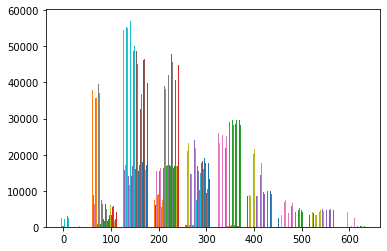

In [7]:
plt.hist(X_train)
plt.show()

See response data's distribution

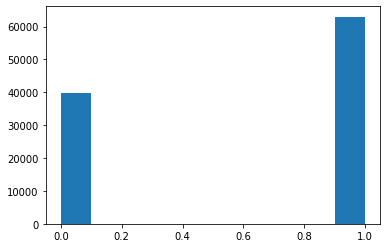

In [8]:
plt.hist(y_train)
plt.show()

Initialize classifiers, one for $\textit{scikit-learn}$ and one for $\textit{OpenCV}$.


In [9]:
rec_skl = SVM('skl')
svm = rec_skl.load('datasets/processed/svm.pkl')

Predict data 

In [10]:
prediction = rec_skl.predict(svm, X_test)

data = [ [p, a] for p,a in zip(y_test, prediction)]

df = pd.DataFrame(data, columns=['Actual', 'Predicted'])

Prediction for the $\textit{scikit-learn}$ SVM classifier

In [11]:
print(df.head())

   Actual  Predicted
0       1          1
1       1          0
2       0          1
3       0          0
4       1          1


Confusion matrixes.

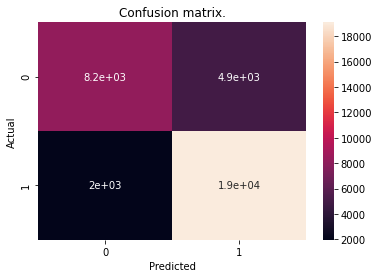

True positives:	 8231
False positives: 1962
True negatives:	 19094
False negatives: 4941
TPR: 0.625
FPR: 0.093
TNR: 0.907
FNR: 0.375


In [12]:
n = y_test.shape[0]

confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix.')
plt.show()

tp = confusion_matrix[0][0]
fp = confusion_matrix[0][1]
fn = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

tpr = tp/(tp+fn)
tnr = tn/(fp+tn)
fpr = 1-tnr
fnr = 1-tpr

print("True positives:\t", tp)
print("False positives:", fp)
print("True negatives:\t", tn)
print("False negatives:", fn)

print("TPR: {:.3f}".format(tpr))
print("FPR: {:.3f}".format(fpr))
print("TNR: {:.3f}".format(tnr))
print("FNR: {:.3f}".format(fnr))